# Machine Learning Project

## Topic : CROP MANAGEMENT: AUTOMATIC PLANT WATERING WITH ML

## Introduction


Project Objective

- To analyse the data to select key attributes for plant watering automation.
- To select appropriate machine learning algorithms to construct predictive models of plant watering automation.
- To evaluate the performance of the model to ensure that it meets expectations in terms of accuracy and comprehensiveness.
- To select best predictive model for plant watering automation.



## Data Understanding

Link of Dataset used: https://www.kaggle.com/datasets/nelakurthisudheer/dataset-for-predicting-watering-the-plants

### Import data science and visualization libraries

In [ ]:
#coding:utf-8
/WQD7004 Programming for Data Science.zip
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set(palette="pastel")

#The magic method in IPython notebook to get the image directly after each run and no longer need to use plt.show()
%matplotlib inline

# Visualization of missing values
import missingno as msno

pylab.rcParams[ 'figure.figsize' ] = 16,9
from scipy.stats import chi2_contingency
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

#Import the warnings package and use filters to implement ignore warning statements.
import warnings
warnings.filterwarnings('ignore')

#Machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
np.random.seed(1234)

### Load Dataset

In [ ]:
# ori_data=pd.read_csv('./automatic_plants_watering.csv')
ori_data=pd.read_csv('TARP.csv')

##### Dataset info

In [ ]:
ori_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Soil Moisture        100000 non-null  int64  
 1   Temperature          100000 non-null  int64  
 2    Soil Humidity       100000 non-null  int64  
 3   Time                 100000 non-null  int64  
 4   Air temperature (C)  23995 non-null   float64
 5   Wind speed (Km/h)    23995 non-null   float64
 6   Air humidity (%)     23995 non-null   float64
 7   Wind gust (Km/h)     23995 non-null   float64
 8   Pressure (KPa)       23995 non-null   float64
 9   ph                   2200 non-null    float64
 10  rainfall             2200 non-null    float64
 11  N                    2200 non-null    float64
 12  P                    2200 non-null    float64
 13  K                    2200 non-null    float64
 14  Status               100000 non-null  object 
dtypes: float64(10), in

In [ ]:
ori_data.sample(5)

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
13504,69,31,30,107,20.1,12.6,76.9,31.12,101.19,NaN,NaN,NaN,NaN,NaN,OFF
72599,22,28,34,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON
42217,6,38,44,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON
97650,5,25,52,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OFF
99120,68,31,55,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ON


In [ ]:
ori_data.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,ON
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,OFF
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,ON
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,OFF
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,OFF


In [ ]:
ori_data.shape

(100000, 15)

In [ ]:
ori_data.columns

Index(['Soil Moisture', 'Temperature', ' Soil Humidity', 'Time',
       'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)',
       'Wind gust (Km/h)', 'Pressure (KPa)', 'ph', 'rainfall', 'N', 'P', 'K',
       'Status'],
      dtype='object')

In [ ]:
ori_data.describe()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K
count,100000.000000,100000.000000,100000.000000,100000.000000,23995.000000,23995.000000,23995.000000,23995.000000,23995.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,45.484070,22.536100,45.016790,55.253650,24.263780,9.896898,58.521052,41.744905,101.131418,6.469480,103.463655,50.551818,53.362727,48.149091
std,25.993998,13.251352,14.726676,32.093033,6.756751,4.325666,30.073448,24.168987,0.218448,0.773938,54.958389,36.917334,32.985883,50.647931
min,1.000000,0.000000,20.000000,0.000000,11.220000,0.000000,0.590000,0.000000,100.500000,3.504752,20.211267,0.000000,5.000000,5.000000
25%,23.000000,11.000000,32.000000,28.000000,18.580000,6.830000,33.980000,21.820000,100.980000,5.971693,64.551686,21.000000,28.000000,20.000000
50%,45.000000,23.000000,45.000000,55.000000,22.150000,9.530000,61.310000,37.240000,101.120000,6.425045,94.867624,37.000000,51.000000,32.000000
75%,68.000000,34.000000,58.000000,83.000000,29.590000,12.460000,86.360000,59.275000,101.260000,6.923643,124.267508,84.250000,68.000000,49.000000
max,90.000000,45.000000,70.000000,110.000000,45.560000,31.360000,96.000000,133.330000,101.860000,9.935091,298.560117,140.000000,145.000000,205.000000


## Data Preparation

### Data Cleaning

###### Identify columns with missing values

In [ ]:
ori_data.isna().any()

Soil Moisture          False
Temperature            False
 Soil Humidity         False
Time                   False
Air temperature (C)     True
Wind speed (Km/h)       True
Air humidity (%)        True
Wind gust (Km/h)        True
Pressure (KPa)          True
ph                      True
rainfall                True
N                       True
P                       True
K                       True
Status                 False
dtype: bool

###### Identify duplicated rows

In [ ]:
ori_data.duplicated().sum()

107

Check for NaN values

In [ ]:
ori_data.isnull().sum()

Soil Moisture              0
Temperature                0
 Soil Humidity             0
Time                       0
Air temperature (C)    76005
Wind speed (Km/h)      76005
Air humidity (%)       76005
Wind gust (Km/h)       76005
Pressure (KPa)         76005
ph                     97800
rainfall               97800
N                      97800
P                      97800
K                      97800
Status                     0
dtype: int64

Change 'Status' column to binary

In [ ]:
def status_to_binary(status):
    if status == 'ON':
        val = 1
    elif status == 'OFF':
        val = 0

    return val

In [ ]:
ori_data['Status'] = ori_data['Status'].apply(status_to_binary)
ori_data.head(10)

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),ph,rainfall,N,P,K,Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,6.502985,202.935536,90.0,42.0,43.0,1
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,7.038096,226.655537,85.0,58.0,41.0,0
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,7.840207,263.964248,60.0,55.0,44.0,1
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,6.980401,242.864034,74.0,35.0,40.0,0
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,7.628473,262.717340,78.0,42.0,42.0,0
5,4,26,52,6,19.67,2.51,51.91,14.69,101.51,7.073454,251.055000,69.0,37.0,42.0,1
6,15,34,58,82,19.74,2.36,50.72,11.85,101.50,5.700806,271.324860,69.0,55.0,38.0,1
7,45,30,43,85,19.80,2.21,49.54,9.02,101.50,5.718627,241.974195,94.0,53.0,40.0,1
8,47,4,42,2,19.91,2.46,47.70,7.23,101.50,6.685346,230.446236,89.0,54.0,38.0,0
9,19,41,22,0,20.02,2.71,45.86,5.44,101.50,6.336254,221.209196,68.0,58.0,38.0,1


#### Dropping "ph, rainfall, N, P, K"

Dropping those columns since they have so many NaN values.
Total data from these columns only contain 2.2 % out of the total data in which are removed from the analysis.

In [ ]:
ori_data.drop('ph', axis=1, inplace=True)
ori_data.drop('rainfall', axis=1, inplace=True)
ori_data.drop('N', axis=1, inplace=True)
ori_data.drop('P', axis=1, inplace=True)
ori_data.drop('K', axis=1, inplace=True)

ori_data.head()

,Soil Moisture,Temperature,Soil Humidity,Time,Air temperature (C),Wind speed (Km/h),Air humidity (%),Wind gust (Km/h),Pressure (KPa),Status
0,54,22,70,21,19.52,2.13,55.04,6.30,101.50,1
1,12,20,40,104,19.49,2.01,55.17,10.46,101.50,0
2,34,26,35,62,19.47,1.90,55.30,14.63,101.51,1
3,7,44,44,93,19.54,2.28,54.20,16.08,101.51,0
4,50,38,23,92,19.61,2.66,53.09,17.52,101.51,0


In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame)
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

new_data = clean_dataset(ori_data)
new_data.shape

(23995, 10)

In [ ]:
new_data.isnull().sum()

Soil Moisture          0
Temperature            0
 Soil Humidity         0
Time                   0
Air temperature (C)    0
Wind speed (Km/h)      0
Air humidity (%)       0
Wind gust (Km/h)       0
Pressure (KPa)         0
Status                 0
dtype: int64

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23995 entries, 0 to 26300
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Soil Moisture        23995 non-null  float64
 1   Temperature          23995 non-null  float64
 2    Soil Humidity       23995 non-null  float64
 3   Time                 23995 non-null  float64
 4   Air temperature (C)  23995 non-null  float64
 5   Wind speed (Km/h)    23995 non-null  float64
 6   Air humidity (%)     23995 non-null  float64
 7   Wind gust (Km/h)     23995 non-null  float64
 8   Pressure (KPa)       23995 non-null  float64
 9   Status               23995 non-null  float64
dtypes: float64(10)
memory usage: 2.0 MB


### Data Exploration

In [ ]:
# custom_autopct function
def custom_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.4f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

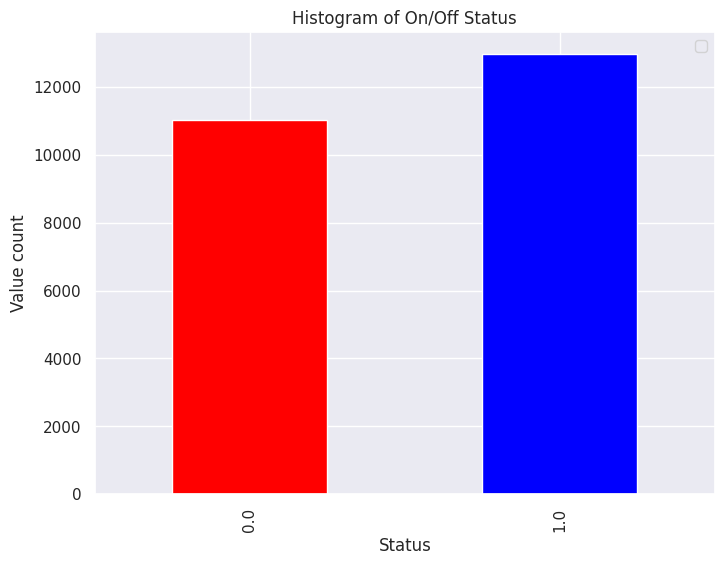

In [ ]:
colors = ['red', 'blue']
plt.figure(figsize=(8,6))
ax = new_data.groupby(['Status']).size().plot(kind='bar', color=colors)
plt.xlabel('Status')
plt.ylabel('Value count')
plt.title('Histogram of On/Off Status')
plt.legend(loc='best')

In [ ]:
StatusCount = new_data['Status'].value_counts()
StatusCount

1.0    12973
0.0    11022
Name: Status, dtype: int64

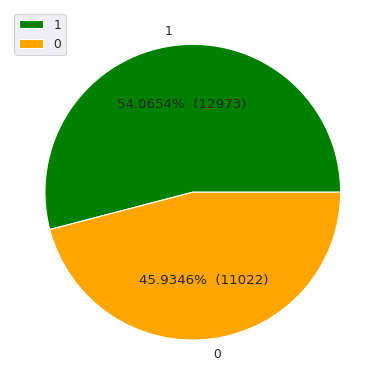

In [ ]:
plt.figure(figsize=(6,6),dpi=80)
StatusCount = new_data['Status'].value_counts()
plt.pie(StatusCount, labels=['1','0'], colors=['green', 'orange'], autopct=custom_autopct(StatusCount))
plt.legend(loc='upper left')

array([[<Axes: title={'center': 'Soil Moisture'}>,
        <Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': ' Soil Humidity'}>],
       [<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Air temperature (C)'}>,
        <Axes: title={'center': 'Wind speed (Km/h)'}>],
       [<Axes: title={'center': 'Air humidity (%)'}>,
        <Axes: title={'center': 'Wind gust (Km/h)'}>,
        <Axes: title={'center': 'Pressure (KPa)'}>],
       [<Axes: title={'center': 'Status'}>, <Axes: >, <Axes: >]],
      dtype=object)

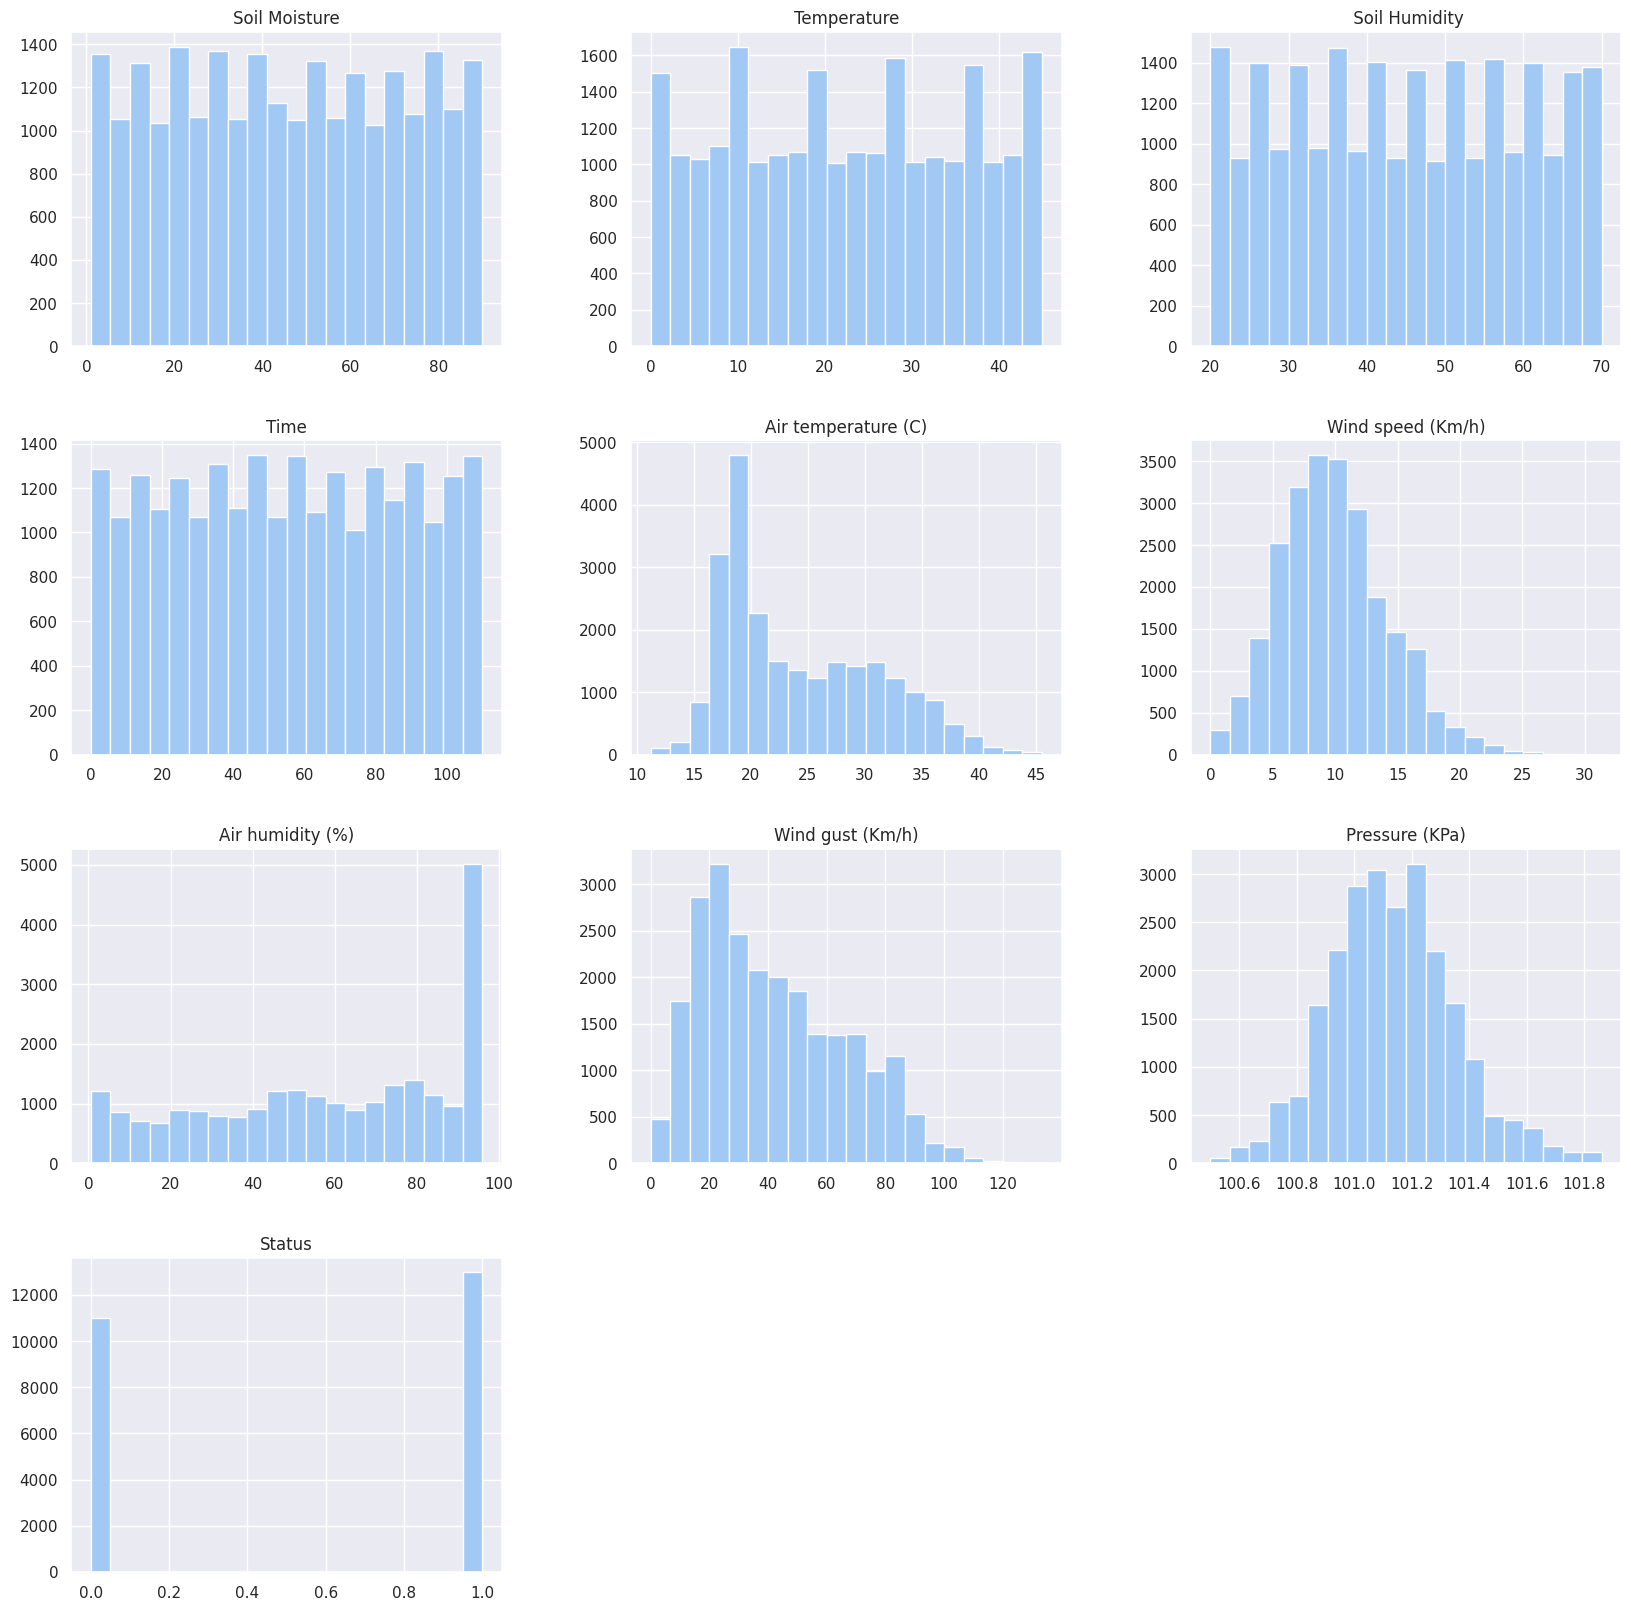

In [ ]:
new_data.hist(bins=20, figsize=(20, 20))

### Correlation analysis

<Axes: >

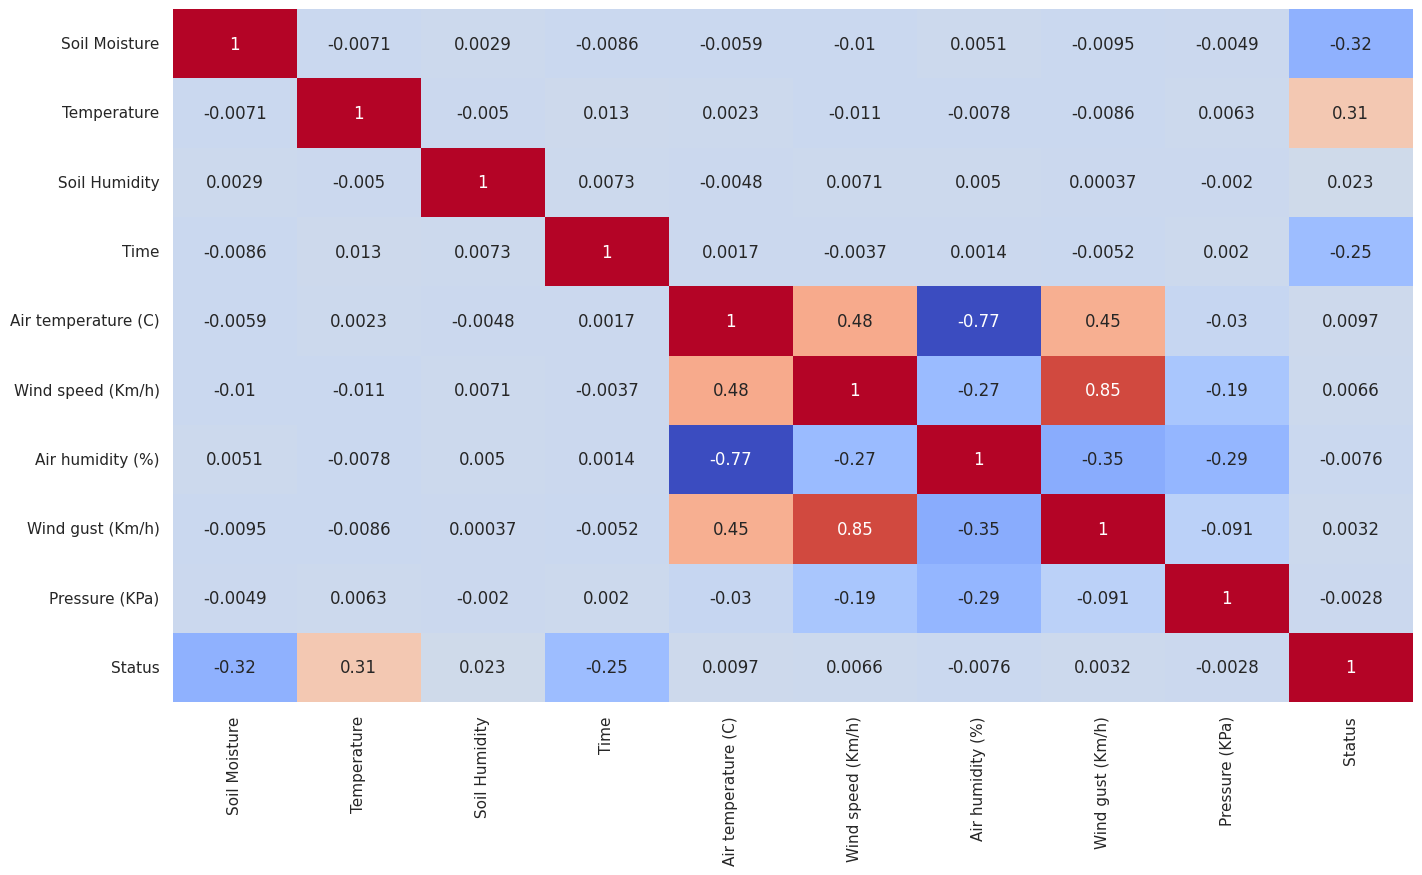

In [ ]:
cormat = new_data.corr()
round(cormat,2)
sns.heatmap(cormat, annot=True, cbar=False, cmap='coolwarm')

- Correlation analysis was done to detect the variables’ relationship with the target variable.
- 'Wind speed (Km/h)' and 'Wind gust (Km/h)' were strongly positive correlated with 0.85.
- Meanwhile, 'Air temperature (C)' and 'Air humidity (%)' were strongly negative correlated with –0.77.
- Since they are highly correlated, 'Wind gust (Km/h)' can be dropped from the dataset as the variable is redundant for further analysis.
- Moreover, 'Wind speed (Km/h)' and 'Wind gust (Km/h)' shows almost the same correlation coefficient with 'Air temperature (C)' which supports the removal of either column from the analysis.
- As for 'Pressure (KPa)' variable was poorly correlated or no correlation with all of the other variables, which is not significant for the analysis.
- As for 'Time' variable, there was insufficient information on time and hence would not be helpful for the analysis. No unit was specified on the 'Time' variable which is useless to intepret further.
- **Therefore, 'Wind gust (Km/h)', 'Time' and 'Pressure (KPa)' will be dropped from the dataset.**

In [ ]:
new_data.drop('Wind gust (Km/h)', axis=1, inplace=True)
new_data.drop('Time', axis=1, inplace=True)
new_data.drop('Pressure (KPa)', axis=1, inplace=True)

new_data.head()

,Soil Moisture,Temperature,Soil Humidity,Air temperature (C),Wind speed (Km/h),Air humidity (%),Status
0,54.0,22.0,70.0,19.52,2.13,55.04,1.0
1,12.0,20.0,40.0,19.49,2.01,55.17,0.0
2,34.0,26.0,35.0,19.47,1.90,55.30,1.0
3,7.0,44.0,44.0,19.54,2.28,54.20,0.0
4,50.0,38.0,23.0,19.61,2.66,53.09,0.0


<Axes: >

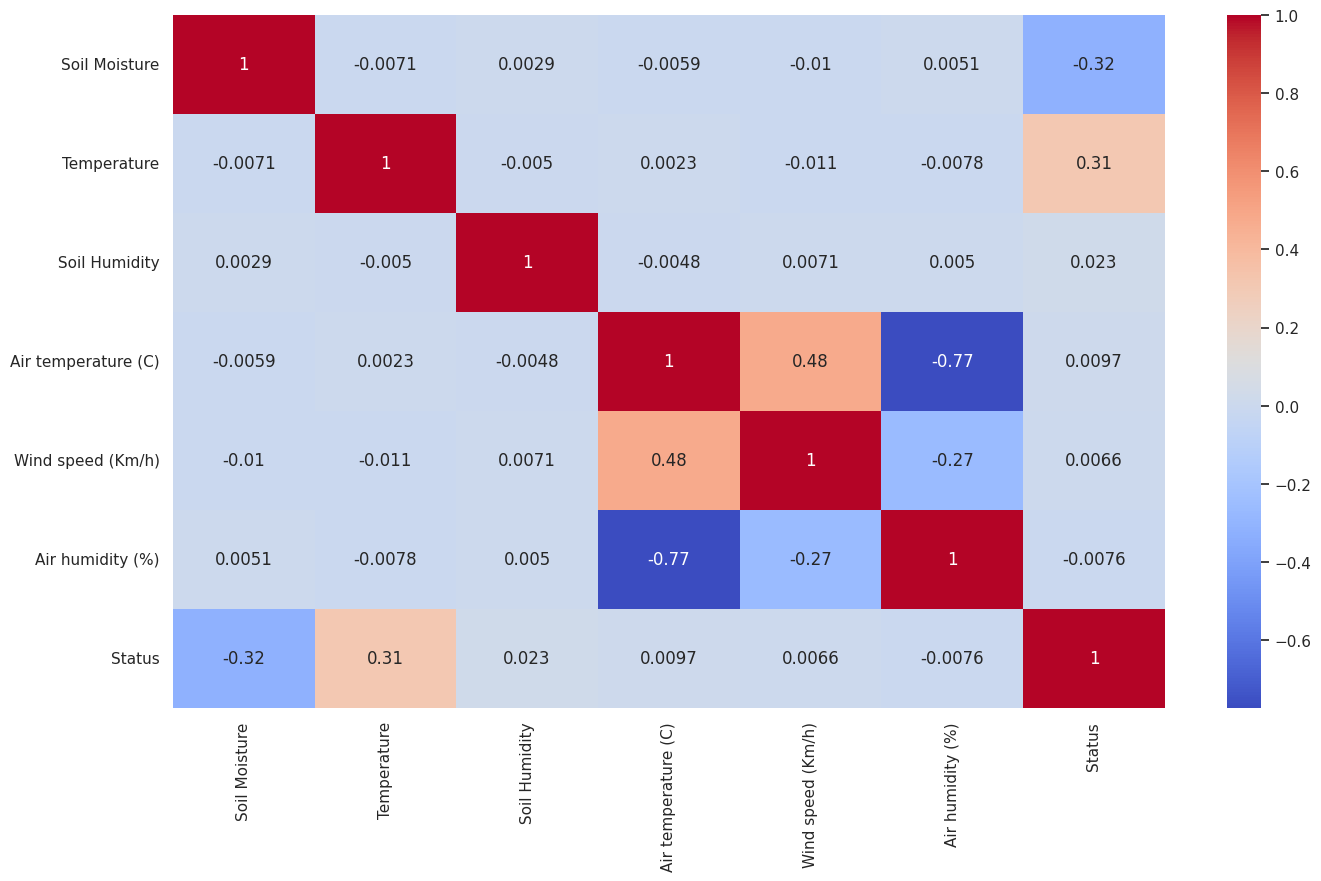

In [ ]:
cormat = new_data.corr()
round(cormat,2)
sns.heatmap(cormat, annot=True, cmap='coolwarm')

In [ ]:
new_data.duplicated().sum()

0

In [ ]:
new_data.shape

(23995, 7)

In [ ]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23995 entries, 0 to 26300
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Soil Moisture        23995 non-null  float64
 1   Temperature          23995 non-null  float64
 2    Soil Humidity       23995 non-null  float64
 3   Air temperature (C)  23995 non-null  float64
 4   Wind speed (Km/h)    23995 non-null  float64
 5   Air humidity (%)     23995 non-null  float64
 6   Status               23995 non-null  float64
dtypes: float64(7)
memory usage: 1.5 MB


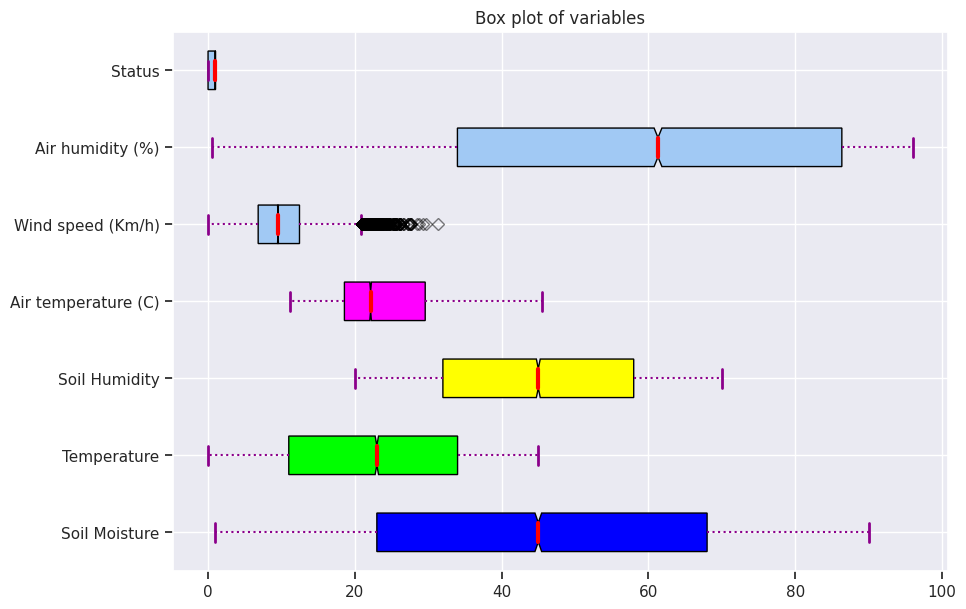

In [ ]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(new_data, patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
ax.set_yticklabels(['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Air humidity (%)', 'Status'])

# Adding title
plt.title("Box plot of variables")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

## Machine Learning

In [ ]:
x = new_data.drop("Status", axis=1)
y = new_data['Status']

In [ ]:
#test size 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=40 )

models = [RandomForestClassifier(),
          svm.SVC(),
          GradientBoostingClassifier()
          ]

names = ['Random Forest',
         'SVM',
         'Gradient Boosting'
         ]

In [ ]:
model_accuracy = []

for name in models:
    model = name
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

,Models,Model accuracy
0,Random Forest,0.730152
2,Gradient Boosting,0.727026
1,SVM,0.699937


In [ ]:
#test size 0.3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=40)

models = [RandomForestClassifier(),
          svm.SVC(),
          GradientBoostingClassifier()
          ]

names = ['Random Forest',
         'SVM',
         'Gradient Boosting'
         ]

In [ ]:
model_accuracy = []

for name in models:
    model = name
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

,Models,Model accuracy
2,Gradient Boosting,0.725656
0,Random Forest,0.724267
1,SVM,0.697458


In [ ]:
#test size 0.4
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=40 )

models = [RandomForestClassifier(),
          svm.SVC(),
          GradientBoostingClassifier()
          ]

names = ['Random Forest',
         'SVM',
         'Gradient Boosting'
         ]

In [ ]:
model_accuracy = []

for name in models:
    model = name
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    test_score = accuracy_score(y_test, y_pred)
    model_accuracy.append(test_score)


evaluation = pd.DataFrame({'Models': names,
                           'Model accuracy': model_accuracy})

evaluation.sort_values(by="Model accuracy",ascending=False)

,Models,Model accuracy
2,Gradient Boosting,0.730777
0,Random Forest,0.726922
1,SVM,0.701500


### Model evaluation (test size 0.4)

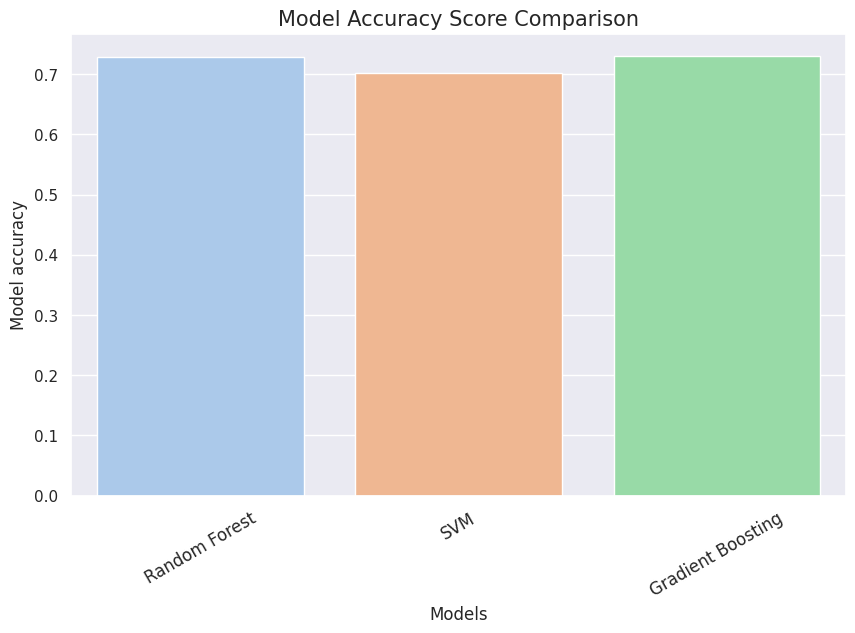

In [ ]:
#visualization of model scores
plt.figure(figsize = (10, 6))
sns.barplot(x = evaluation["Models"], y = evaluation["Model accuracy"])
plt.title("Model Accuracy Score Comparison", size = 15)
plt.xticks(rotation = 30, size = 12)
plt.show()

### Hyperparameter tuning of Gradient Boost Classifier

In [ ]:
#initial Gradient Boosting Classifier model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=40 )

firstmodel = GradientBoostingClassifier()
firstmodel.fit(x_train,y_train)
pred=firstmodel.predict(x_test)
print('Accuracy on test set: {:.4f}'.format(firstmodel.score(x_test, y_test)))

Accuracy on test set: 0.7308


In [ ]:
#tuning 'learning_rate' parameter
test1 = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(n_estimators=100, max_depth=4),param_grid = test1, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_

{'learning_rate': 0.1}

In [ ]:
#tuning 'n_estimators' parameter
test2 = {'n_estimators':[25,50,100,250,500,750]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1, max_depth=4),param_grid = test2, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_

{'n_estimators': 50}

In [ ]:
#tuning 'max_depth' parameter
test3 = {'max_depth':[2,3,4,5,6,7]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(learning_rate=0.1, n_estimators=50),param_grid = test3, scoring='accuracy',n_jobs=4, cv=5)
tuning.fit(x_train,y_train)
tuning.best_params_

{'max_depth': 5}

In [ ]:
#Score evaluation of tuned GBC final model
finalGBC = GradientBoostingClassifier(learning_rate=0.1, n_estimators=50,max_depth=5)
finalGBC.fit(x_train,y_train)
GBCpred=finalGBC.predict(x_test)
print('Accuracy on test set: {:.4f}'.format(finalGBC.score(x_test, y_test)))
print(classification_report(y_test, GBCpred))

Accuracy on test set: 0.7341
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      4397
         1.0       0.74      0.78      0.76      5201

    accuracy                           0.73      9598
   macro avg       0.73      0.73      0.73      9598
weighted avg       0.73      0.73      0.73      9598



### Confusion Matrix (Actual vs Predicted Values)

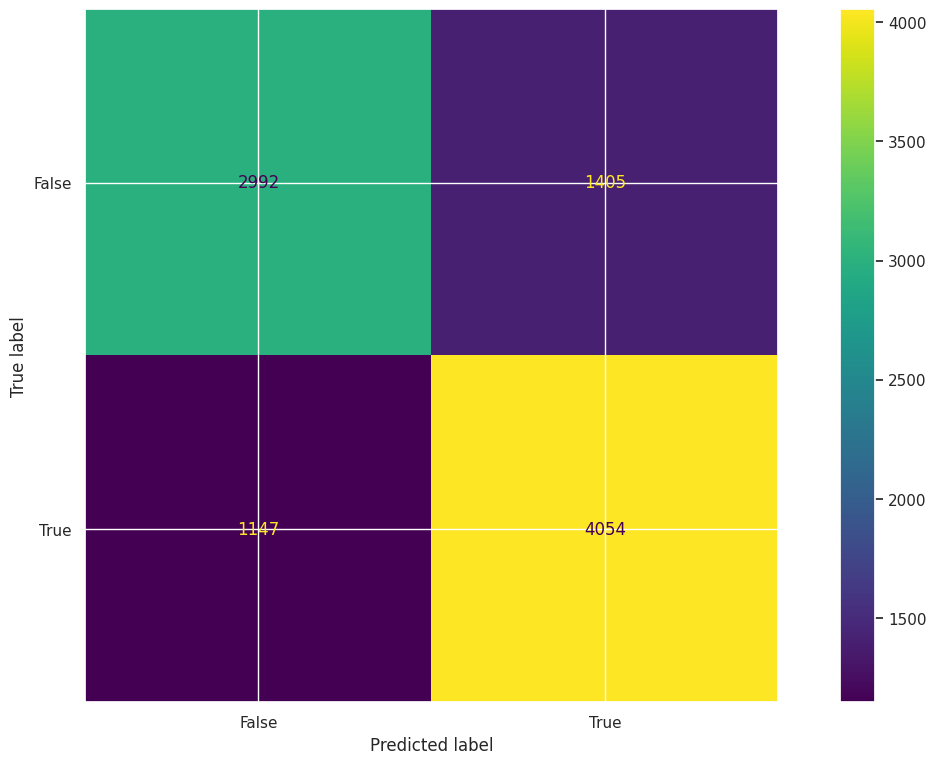

In [ ]:
#Analysis of actual values vs predicted values based on tuned GBC model
confusion_matrix = metrics.confusion_matrix(y_test, GBCpred)
cm = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm.plot()
plt.show()

In [ ]:
feature_importance = finalGBC.feature_importances_
importance_df = pd.DataFrame({'features': x_train.columns,
                              'importance': feature_importance})
importance_df.sort_values(by='importance', ascending=False, inplace=True)
importance_df

,features,importance
0,Soil Moisture,0.406025
1,Temperature,0.356381
2,Soil Humidity,0.170792
4,Wind speed (Km/h),0.028575
3,Air temperature (C),0.021279
5,Air humidity (%),0.016948
